# Analyzing the weather of Berlin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Load data - Temperatures in Berlin

This a comma separated value file (CSV) with 5 columns: 
* minimum temperature
* maximum temperature
* year day
* year 
* month

In [3]:
datafi = './data/Dailytemp_Berlin_2009-09-01-2019-09-01.csv'
arr = np.loadtxt(datafi, delimiter=',')
arr

array([[  16.,   32.,  244., 2009.,    9.],
       [  17.,   24.,  245., 2009.,    9.],
       [  17.,   22.,  246., 2009.,    9.],
       ...,
       [  21.,   28.,  242., 2019.,    8.],
       [  22.,   32.,  243., 2019.,    8.],
       [  19.,   27.,  244., 2019.,    9.]])

Text(0.5, 1.0, 'Maximum and minimum daily temperatures in Berlin between 01-SEP-2009 and 01-SEP-2019')

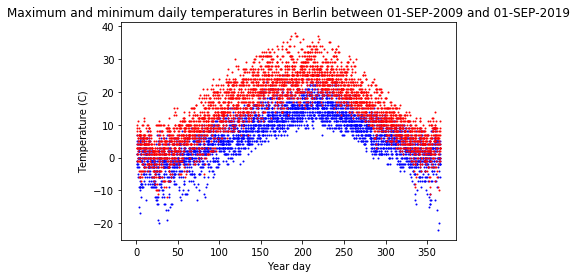

In [4]:
plt.scatter(arr[:, 2], arr[:, 0], s=1, c='b')
plt.scatter(arr[:, 2], arr[:, 1], s=1, c='r')
plt.xlabel('Year day')
plt.ylabel('Temperature (C)')
plt.title('Maximum and minimum daily temperatures in Berlin between 01-SEP-2009 and 01-SEP-2019')

## How many warm days did we have per year?

In [10]:
high_T = 30
high_temps = arr[arr[:, 1]>=high_T]
n_hot_days_di = Counter(high_temps[:, 3])

In [11]:
x = n_hot_days_di.keys()
y = n_hot_days_di.values()

<BarContainer object of 11 artists>

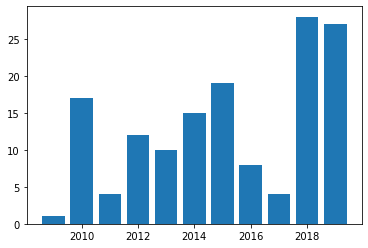

In [12]:
plt.bar(x, y)

## Not very practical to refer to the column names with indexes, can we do better?

Lets use Pandas!

In [13]:
import pandas as pd

In [14]:
cols = ['mintempC', 'maxtempC', 'year_day', 'year', 'month']
df = pd.read_csv(datafi, names=cols)
df.head()

,mintempC,maxtempC,year_day,year,month
0,16,32,244,2009,9
1,17,24,245,2009,9
2,17,22,246,2009,9
3,14,21,247,2009,9
4,11,18,248,2009,9


Take the subset with high temperatures

In [15]:
thisdf = df.loc[df['maxtempC'] >= high_T]

Let's use a barplot to visualize the number of days in a given year where the temperatures is at least 30 C.

In [16]:
di_yr_ndys = Counter(thisdf['year'])
x = di_yr_ndys.keys()
y = di_yr_ndys.values()

Text(0, 0.5, 'counts')

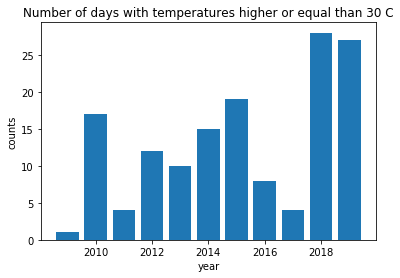

In [17]:
plt.bar(x, y)
plt.title('Number of days with temperatures higher or equal than {} C'.format(high_T))
plt.xlabel('year')
plt.ylabel('counts')

This visualization is not optimal and it takes quite a lot of lines for such a simple question. Can we visualize sounds with less lines?
Yes, that's when Seaborn comes very handy. When making common statistical plots.

In [18]:
import seaborn as sns

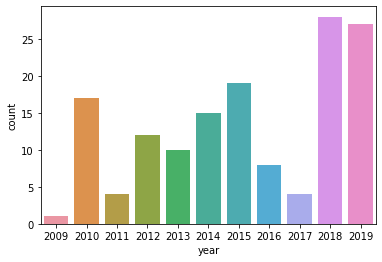

In [19]:
sns.countplot(x = 'year', data = thisdf)

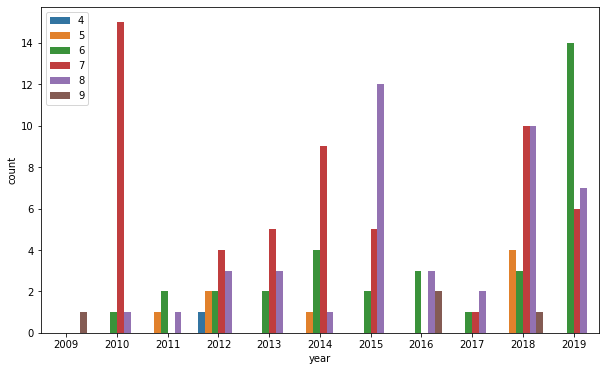

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'year', data = thisdf, hue = 'month')
plt.legend(loc='upper left')